In [1]:
import pandas as pd
import pylab as plt
import requests
import os
import urllib
import base64
import io
import numpy as np
import locale

# Load the data

In [2]:
url ='https://query.data.world/s/jiueczjikmpwyiahc6zrllbmkcxzi6'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])

# Plot cumulative death counts

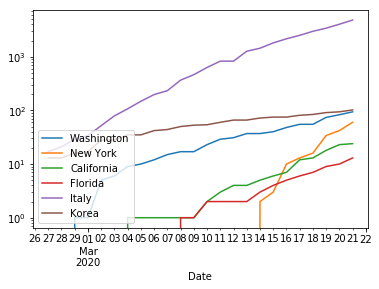

In [3]:
deaths=df['Case_Type']=='Deaths'
logy=True
regions=['Washington', 'New York', 'California', 'Florida']
for region in regions:
    df[deaths & (df['Province_State']==region)].groupby('Date').max()['Cases'].iloc[35:].plot(logy=logy)
df[deaths & (df['Country_Region']=='Italy')].groupby('Date').max()['Cases'].iloc[35:].plot(logy=logy)
df[deaths & (df['Country_Region']=='Korea, South')].groupby('Date').max()['Cases'].iloc[35:].plot(logy=logy)

plt.legend(regions+['Italy', 'Korea'], loc='lower left')

# Plot cumulative Confirmed cases

Text(0, 0.5, 'Log(Number)')

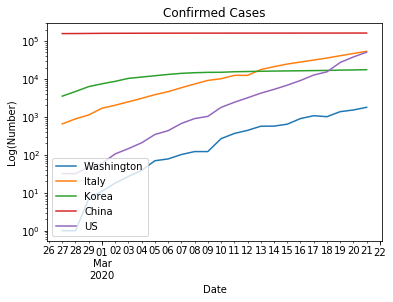

In [4]:
logy=True
confirmed = df['Case_Type']=='Confirmed'
regions=['Washington']
for region in regions:
    df[confirmed & (df['Province_State']==region)].groupby('Date').sum()['Cases'].iloc[35:].plot(logy=logy)
df[confirmed & (df['Country_Region']=='Italy')].groupby('Date').sum()['Cases'].iloc[35:].plot(logy=logy)
df[(df['Country_Region']=='Korea, South')].groupby('Date').sum()['Cases'].iloc[35:].plot(logy=logy)
df[(df['Country_Region']=='China')].groupby('Date').sum()['Cases'].iloc[35:].plot(logy=logy)
df[(df['Country_Region']=='US')].groupby('Date').sum()['Cases'].iloc[35:].plot(logy=logy)

plt.legend(regions+['Italy', 'Korea', 'China', 'US'], loc='lower left')
plt.title('Confirmed Cases')
plt.ylabel('Log(Number)')